In [2]:
! mkdir dataset

In [8]:
cd dataset

C:\Users\pc\PycharmProjects\TensorProject\DL\CVClassifiaction\Binary Classification\dataset


In [9]:
! kaggle datasets download -d tongpython/cat-and-dog


  0%|          | 0.00/218M [00:00<?, ?B/s]
  0%|          | 1.00M/218M [00:00<01:10, 3.23MB/s]
  2%|1         | 4.00M/218M [00:00<00:23, 9.36MB/s]
  3%|2         | 6.00M/218M [00:00<00:20, 11.0MB/s]
  4%|4         | 9.00M/218M [00:00<00:14, 14.8MB/s]
  5%|5         | 11.0M/218M [00:00<00:14, 14.5MB/s]
  6%|5         | 13.0M/218M [00:01<00:14, 14.4MB/s]
  7%|6         | 15.0M/218M [00:01<00:14, 14.6MB/s]
  8%|7         | 17.0M/218M [00:01<00:14, 14.4MB/s]
  9%|8         | 19.0M/218M [00:01<00:14, 14.4MB/s]
 10%|9         | 21.0M/218M [00:01<00:13, 14.9MB/s]
 11%|#         | 23.0M/218M [00:01<00:13, 15.1MB/s]
 11%|#1        | 25.0M/218M [00:01<00:14, 14.3MB/s]
 12%|#2        | 27.0M/218M [00:02<00:13, 14.6MB/s]
 13%|#3        | 29.0M/218M [00:02<00:12, 15.4MB/s]
 14%|#4        | 31.0M/218M [00:02<00:13, 14.4MB/s]
 15%|#5        | 33.0M/218M [00:02<00:12, 14.9MB/s]
 16%|#6        | 35.0M/218M [00:02<00:12, 14.8MB/s]
 17%|#6        | 37.0M/218M [00:02<00:12, 14.7MB/s]
 18%|#7        | 39.

In [21]:
! cd

C:\Users\pc\PycharmProjects\TensorProject\DL\CVClassifiaction\Binary Classification\dataset


In [24]:
import zipfile
with zipfile.ZipFile("cat-and-dog.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset/")

# Importing Dataset

In [73]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

tf.debugging.set_log_device_placement(True)

In [74]:
train_df = "dataset/training_set/training_set"
test_df = "dataset/test_set/test_set"

In [75]:
gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=0.2,
    fill_mode='nearest',
)

In [84]:
train_gen = gen.flow_from_directory(
    train_df,
    target_size=(200, 200),
    batch_size=30,
    class_mode='binary',
    shuffle=True,
)

test_gen = gen.flow_from_directory(
    test_df,
    target_size=(200, 200),
    batch_size=30,
    class_mode='binary',
    shuffle=False,
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [96]:
# PARAMETERS

EPOCHS=15
VERB=2

In [102]:
model = Sequential([
    layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'), 
])

In [103]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 25, 25, 64)       

In [104]:
opt= keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
history=model.fit(train_gen, epochs=EPOCHS,
                 validation_data=test_gen,
                 validation_steps=50, steps_per_epoch=100,
                 verbose=VERB)

Epoch 1/15
100/100 - 36s - loss: 0.6929 - accuracy: 0.5173 - val_loss: 0.6881 - val_accuracy: 0.5967
Epoch 2/15
100/100 - 35s - loss: 0.6757 - accuracy: 0.5683 - val_loss: 0.7553 - val_accuracy: 0.3940
Epoch 3/15
100/100 - 35s - loss: 0.6610 - accuracy: 0.5937 - val_loss: 0.7004 - val_accuracy: 0.5320
Epoch 4/15
100/100 - 35s - loss: 0.6495 - accuracy: 0.6160 - val_loss: 0.6481 - val_accuracy: 0.6373
Epoch 5/15
100/100 - 35s - loss: 0.6314 - accuracy: 0.6350 - val_loss: 0.6117 - val_accuracy: 0.6753
Epoch 6/15
100/100 - 35s - loss: 0.6280 - accuracy: 0.6487 - val_loss: 0.6151 - val_accuracy: 0.6847
Epoch 7/15
100/100 - 35s - loss: 0.5995 - accuracy: 0.6664 - val_loss: 0.7094 - val_accuracy: 0.5753
Epoch 8/15
100/100 - 35s - loss: 0.6122 - accuracy: 0.6657 - val_loss: 0.6307 - val_accuracy: 0.6613
Epoch 9/15
100/100 - 35s - loss: 0.5867 - accuracy: 0.6888 - val_loss: 0.7023 - val_accuracy: 0.5900
Epoch 10/15
100/100 - 35s - loss: 0.5891 - accuracy: 0.6827 - val_loss: 0.6166 - val_accura

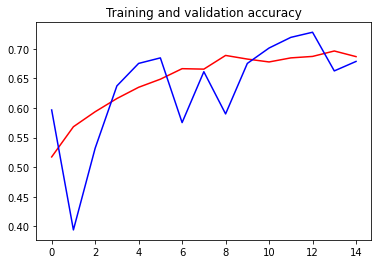

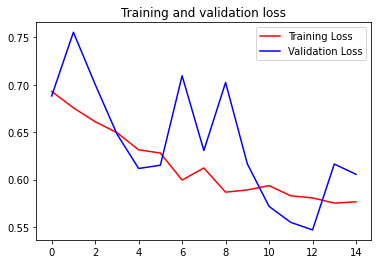

In [106]:
# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()